In [1]:
%matplotlib notebook

In [2]:
import pylab as pl
import numpy as np

### this code snippet will load the next cell with the global preamble

```
with open('preamble.py', 'r') as fh:
    preamble = fh.read()
get_ipython().set_next_input(preamble)
```

In [3]:
%matplotlib inline
import numpy as np
from astropy import units as u
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)
import sys
import glob
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import selfcal_heuristics
import spectral_cube
import os
os.chdir("/lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/imaging_results")

In [4]:
import casatools
tb = casatools.table()
msmd = casatools.msmetadata()
ms = casatools.ms()

In [5]:
msfile = '../W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_selfcal.ms/'

In [30]:
caltable = '../W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_phase4_int.cal/'
tb.open(caltable)
data = {col: tb.getcol(col) for col in tb.colnames() if col not in ("WEIGHT",)}
data['ANGLE'] = np.angle(data['CPARAM'])
tb.close()

True

In [7]:
okfields,notokfields = selfcal_heuristics.goodenough_field_solutions(caltable,
                                                                     minsnr=5)
print(okfields, notokfields)

[16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 35] [11, 12, 13, 14, 15, 19, 24, 29, 33, 34, 36, 37]


In [8]:
fieldOKmask = np.isin(data['FIELD_ID'], okfields)

In [9]:
msmd.open(msfile)
msmd.close()

True

In [10]:
fids = np.unique(data['FIELD_ID'])
print(fids)

[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37]


In [11]:
oids = np.unique(data['OBSERVATION_ID'])
print(oids)

[ 2  3 12]


In [12]:
spwids = np.unique(data['SPECTRAL_WINDOW_ID'])
print(spwids)

[12 13 14 15 16 17 18 19 20 21 22 23 72 73 74 75 76 77]


In [13]:
# which observations contain which fields?
for oid in oids:
    oid_match = data['OBSERVATION_ID'] == oid
    has_fid = [fid for fid in fids if np.any((data['FIELD_ID'] == fid) & oid_match)]
    print(f"OID {oid} has fields {has_fid}")

OID 2 has fields [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
OID 3 has fields [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
OID 12 has fields [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


fids_12m = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44]fids_7m = [0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]


In [14]:
fids_12m = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

In [15]:
print({col: data[col].shape for col in data})

{'TIME': (605153,), 'FIELD_ID': (605153,), 'SPECTRAL_WINDOW_ID': (605153,), 'ANTENNA1': (605153,), 'ANTENNA2': (605153,), 'INTERVAL': (605153,), 'SCAN_NUMBER': (605153,), 'OBSERVATION_ID': (605153,), 'CPARAM': (2, 1, 605153), 'PARAMERR': (2, 1, 605153), 'FLAG': (2, 1, 605153), 'SNR': (2, 1, 605153), 'ANGLE': (2, 1, 605153)}


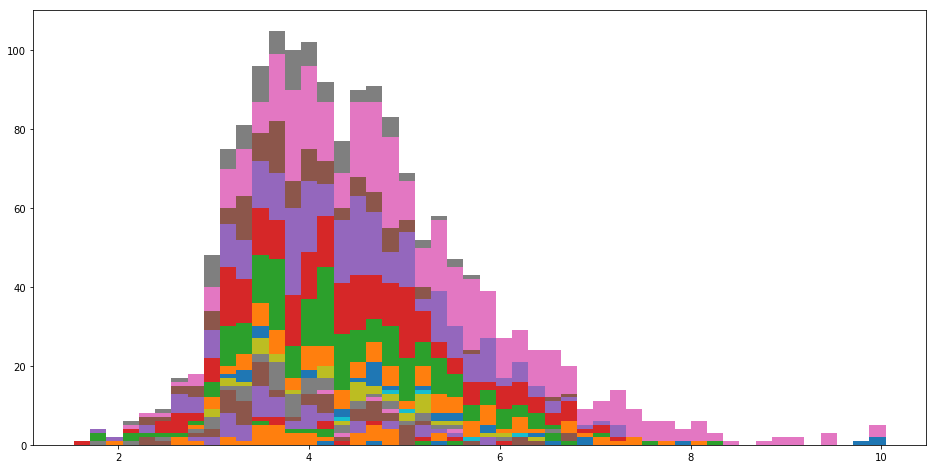

In [16]:
OK = data['SNR'] != 0

toplot = [data['SNR'][0,0, (data['FIELD_ID'] == 14) & (OK[0,0,:]) & (data['SPECTRAL_WINDOW_ID'] == spwid)]
          for spwid in spwids]

H,L,P = pl.hist(toplot, bins=50, stacked=True)

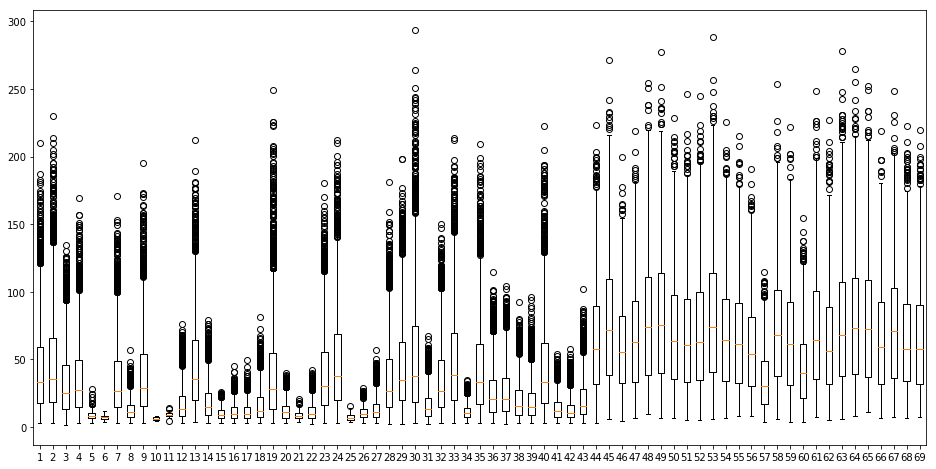

In [17]:
OK = data['SNR'] != 0

toplot = [data['SNR'][0,0, fieldOKmask & (OK[0,0,:]) & (data['ANTENNA1'] == ant)]
          for ant in np.unique(data['ANTENNA1'])]
toplot = [x for x in toplot if len(x) > 0]

_ = pl.boxplot(toplot)

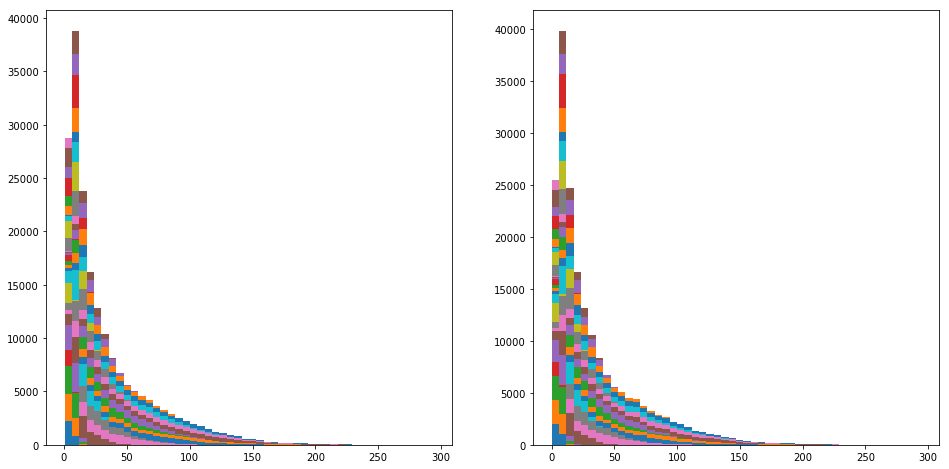

In [18]:
OK = data['SNR'] != 0

toplot = [data['SNR'][0,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
          for fid in fids_12m]

pl.subplot(1,2,1)
H,L,P = pl.hist(toplot, bins=50, stacked=True)

toplot = [data['SNR'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
          for fid in fids_12m]

pl.subplot(1,2,2)
H,L,P = pl.hist(toplot, bins=50, stacked=True)

Per-field stats:

In [19]:
for fid in fids_12m:
    dat = data['SNR'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
    ang = data['ANGLE'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
    print(f"fid={fid:03d} mean={dat.mean():10.2f} median={np.median(dat):10.2f} std={dat.std():10.2f} angle_rms={ang.std():10.2f}")

fid=011 mean=      4.69 median=      4.93 std=      2.94 angle_rms=      0.24
fid=012 mean=      5.51 median=      5.67 std=      3.10 angle_rms=      0.35
fid=013 mean=      6.16 median=      6.25 std=      3.47 angle_rms=      0.25
fid=014 mean=      3.16 median=      3.81 std=      2.67 angle_rms=      0.19
fid=015 mean=      7.19 median=      6.90 std=      3.62 angle_rms=      0.22
fid=016 mean=     16.50 median=     14.34 std=      9.53 angle_rms=      0.13
fid=017 mean=     35.25 median=     31.19 std=     22.95 angle_rms=      0.11
fid=018 mean=     25.11 median=     21.89 std=     16.19 angle_rms=      0.11
fid=019 mean=      3.03 median=      3.72 std=      2.58 angle_rms=      0.23
fid=020 mean=     14.89 median=     13.37 std=      7.93 angle_rms=      0.18
fid=021 mean=     57.87 median=     54.81 std=     37.25 angle_rms=      0.13
fid=022 mean=     60.80 median=     51.67 std=     44.82 angle_rms=      0.16
fid=023 mean=     33.05 median=     29.07 std=     21.47 angle_r

In [20]:
msmd.open('../W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_selfcal.ms/')
antobs = {}
for oid in np.unique(data['OBSERVATION_ID']):
    antids = np.unique(data['ANTENNA1'][(data['OBSERVATION_ID']==oid) & (OK[0,0,:])])
    antnames = {k:v for k,v in zip(antids, msmd.antennanames(antids))}

    center = (np.mean([msmd.antennaoffset(k)['latitude offset']['value'] for k in antnames]),
              np.mean([msmd.antennaoffset(k)['longitude offset']['value'] for k in antnames]),)
    print(oid, center)
    
    antdist = {k:((msmd.antennaoffset(k)['latitude offset']['value']-center[0])**2 + (msmd.antennaoffset(k)['longitude offset']['value']-center[1])**2)**0.5
               for k in antnames}
    antloc = {k:(msmd.antennaoffset(k)['latitude offset']['value'], msmd.antennaoffset(k)['longitude offset']['value'])
               for k in antnames}

    antobs[oid] = {'antnames': antnames,
                   'antdist': antdist,
                   'antloc': antloc}
msmd.close()
antdist = {(ant,oid): antobs[oid]['antdist'][ant] for oid in antobs for ant in antobs[oid]['antnames']}
antnames = {(ant,oid): antobs[oid]['antnames'][ant] for oid in antobs for ant in antobs[oid]['antnames']}

2 (-677.41872677985134, 34.472188158015804)
3 (-676.38481561887704, 50.474729370491879)
12 (-708.34688825572312, 22.236483871868082)


In [75]:
antstats = {}
for oid in np.unique(data['OBSERVATION_ID']):
    for antid in np.unique(data['ANTENNA1']):
        msk = (data['ANTENNA1'] == antid) & (OK[0,0,:]) & fieldOKmask & (data['OBSERVATION_ID'] == oid)
        if np.any(msk) and (antid, oid) in antnames:
            dat = data['SNR'][1,0, msk]
            ang = data['ANGLE'][1,0, msk]*180/np.pi
            print(f"antenna={antnames[(antid,oid)]} oid={oid} dist={antdist[(antid,oid)]:6.1f} "
                  f"mean={dat.mean():10.2f} median={np.median(dat):10.2f} "
                  f"std={dat.std():10.2f}  angle_rms={ang.std():10.2f}")
            antstats[(antid,oid)] = {'mean':dat.mean(),
                                     'median':np.median(dat),
                                     'std': dat.std(),
                                     'angle_rms': ang.std(),
                                     'angle_mean': ang.mean(),
                                     'angle_median': np.median(ang),
                                   }

antenna=DA41 oid=2 dist=  46.2 mean=     30.17 median=     21.19 std=     24.73  angle_rms=     10.75
antenna=DA42 oid=2 dist=  34.5 mean=     32.94 median=     23.42 std=     27.00  angle_rms=     11.01
antenna=DA43 oid=2 dist= 151.2 mean=     24.70 median=     17.38 std=     20.08  angle_rms=     11.10
antenna=DA44 oid=2 dist=  62.9 mean=     24.05 median=     17.38 std=     19.72  angle_rms=     10.64
antenna=DA45 oid=2 dist= 524.7 mean=      9.88 median=      9.10 std=      4.20  angle_rms=      6.01
antenna=DA46 oid=2 dist= 826.7 mean=      8.02 median=      8.02 std=      0.00  angle_rms=      0.00
antenna=DA47 oid=2 dist=  29.5 mean=     30.33 median=     21.05 std=     24.81  angle_rms=     10.78
antenna=DA48 oid=2 dist= 259.8 mean=     12.05 median=     10.04 std=      7.88  angle_rms=      7.78
antenna=DA49 oid=2 dist=  52.3 mean=     28.33 median=     19.48 std=     23.47  angle_rms=     10.45
antenna=DA51 oid=2 dist= 594.8 mean=      7.81 median=      7.81 std=      0.00  a

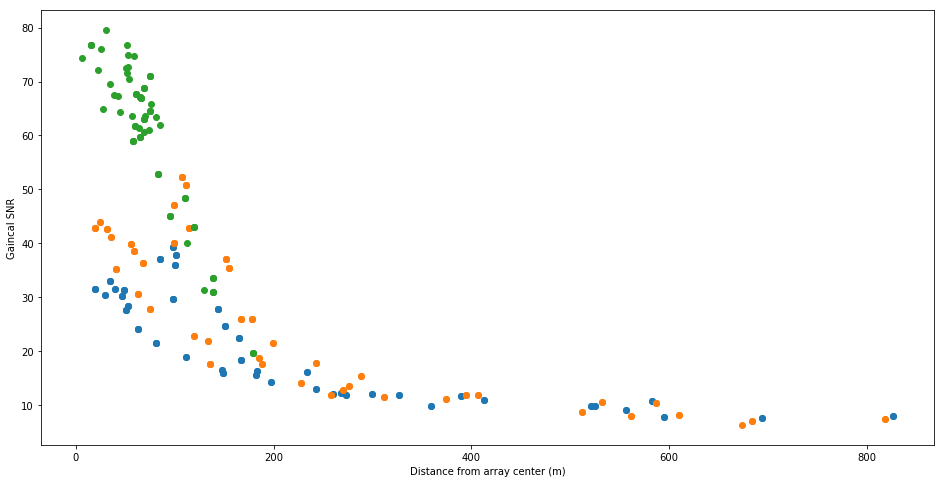

In [76]:
uoids = np.unique(data['OBSERVATION_ID'])
for oid in uoids:
    pl.plot([antdist[(ant,oid)] for ant,_ in antstats  if (ant,oid) in antstats],
            [antstats[(ant,oid)]['mean'] for ant,_ in antstats  if (ant,oid) in antstats],
            'o')
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal SNR")

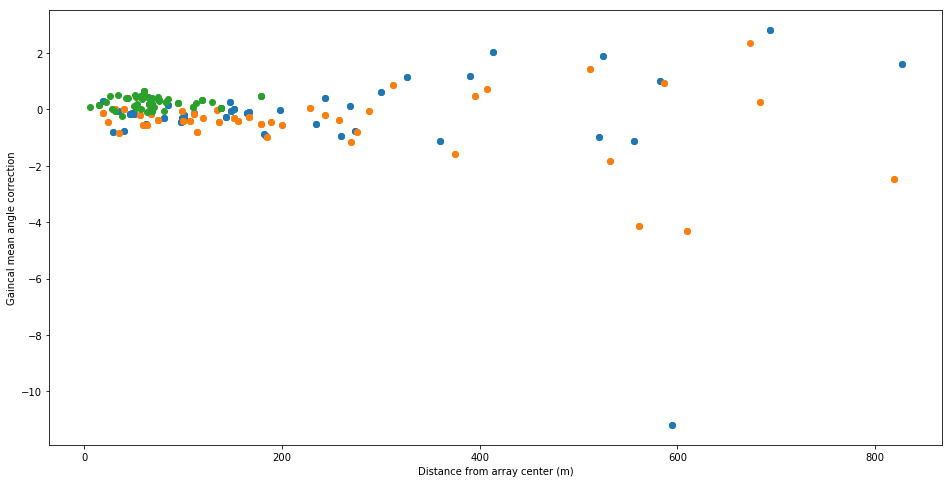

In [77]:
uoids = np.unique(data['OBSERVATION_ID'])
for oid in uoids:
    pl.plot([antdist[(ant,oid)] for ant,_ in antstats  if (ant,oid) in antstats],
            [antstats[(ant,oid)]['angle_mean'] for ant,_ in antstats  if (ant,oid) in antstats],
            'o')
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal mean angle correction")

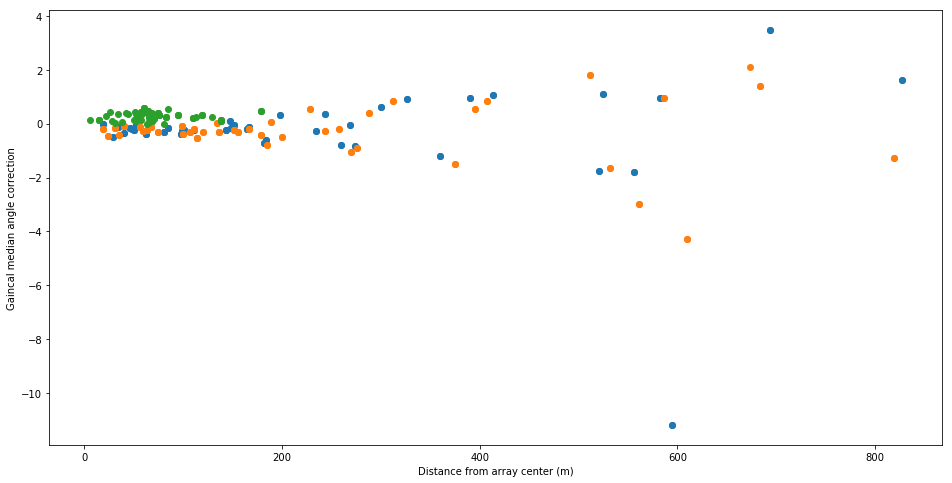

In [78]:
uoids = np.unique(data['OBSERVATION_ID'])
for oid in uoids:
    pl.plot([antdist[(ant,oid)] for ant,_ in antstats  if (ant,oid) in antstats],
            [antstats[(ant,oid)]['angle_median'] for ant,_ in antstats  if (ant,oid) in antstats],
            'o')
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal median angle correction")

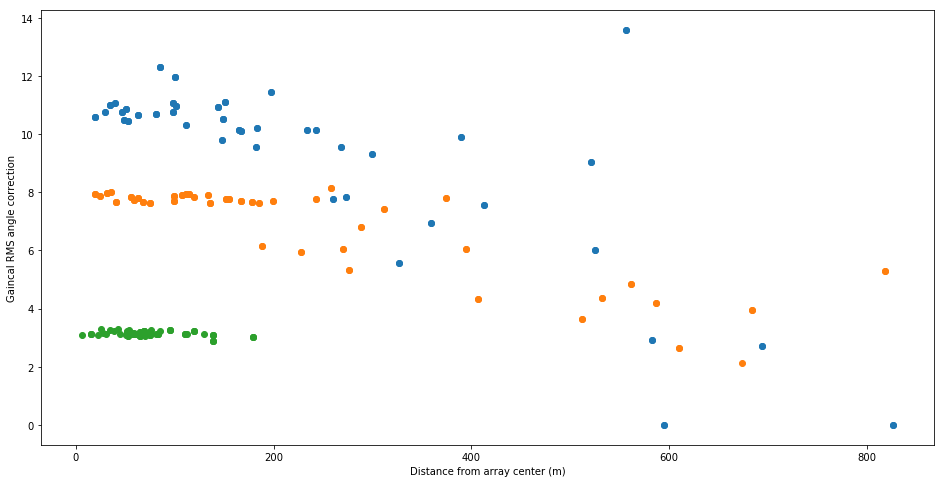

In [79]:
uoids = np.unique(data['OBSERVATION_ID'])
for oid in uoids:
    pl.plot([antdist[(ant,oid)] for ant,_ in antstats  if (ant,oid) in antstats],
            [antstats[(ant,oid)]['angle_rms'] for ant,_ in antstats  if (ant,oid) in antstats],
            'o')
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal RMS angle correction")

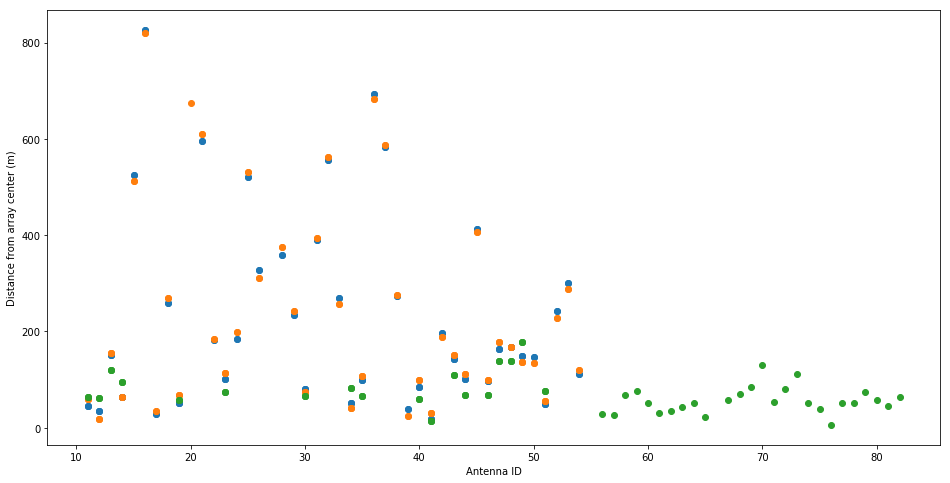

In [23]:
uoids = np.unique(data['OBSERVATION_ID'])
for oid in uoids:
    pl.plot(
            [ant for ant,_ in antstats  if (ant,oid) in antstats],
            [antdist[(ant,oid)] for ant,_ in antstats  if (ant,oid) in antstats],
            'o')
pl.ylabel("Distance from array center (m)")
pl.xlabel("Antenna ID")

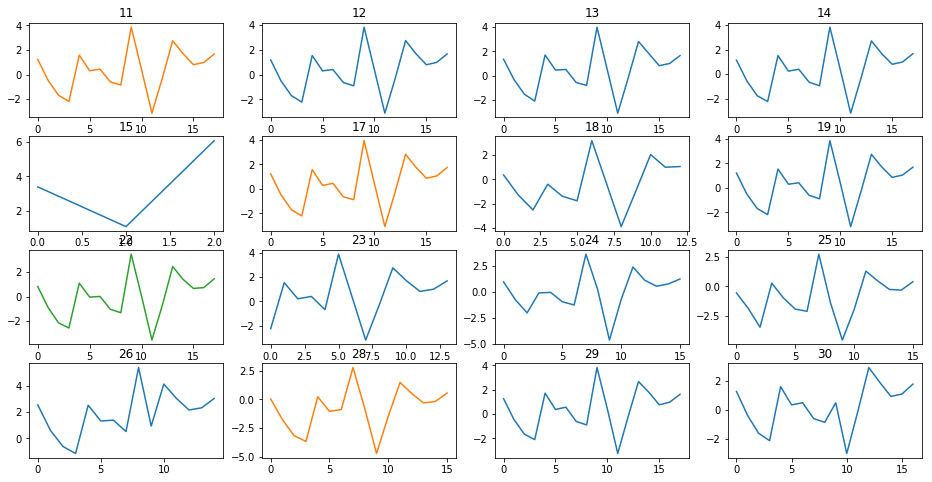

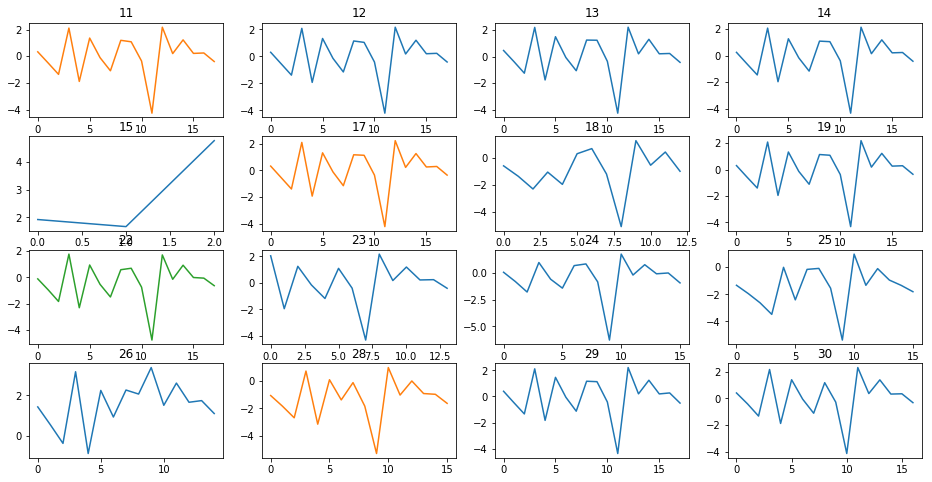

In [24]:
fid = 31 # best s/n
nant = len(np.unique(data['ANTENNA1']))
for pol in (0,1):
    pl.figure()
    cnt = 0

    for ii,ant in enumerate(np.unique(data['ANTENNA1'])):
        ax = pl.subplot(4, 4, cnt+1)
        msk = (data['ANTENNA1'] == ant) & (data['FIELD_ID'] == fid) & (OK[pol,0,:]) & (data['SPECTRAL_WINDOW_ID'] == 12)
        ax.plot(data['ANGLE'][pol,0,msk]*180/np.pi)
        ax.set_title(str(ant))
        if np.any(msk):
            cnt += 1
        if cnt > 15:
            break


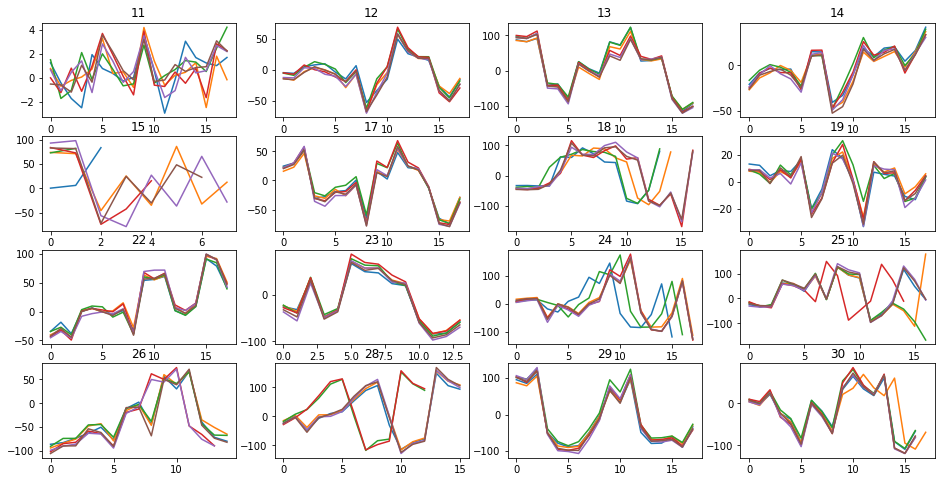

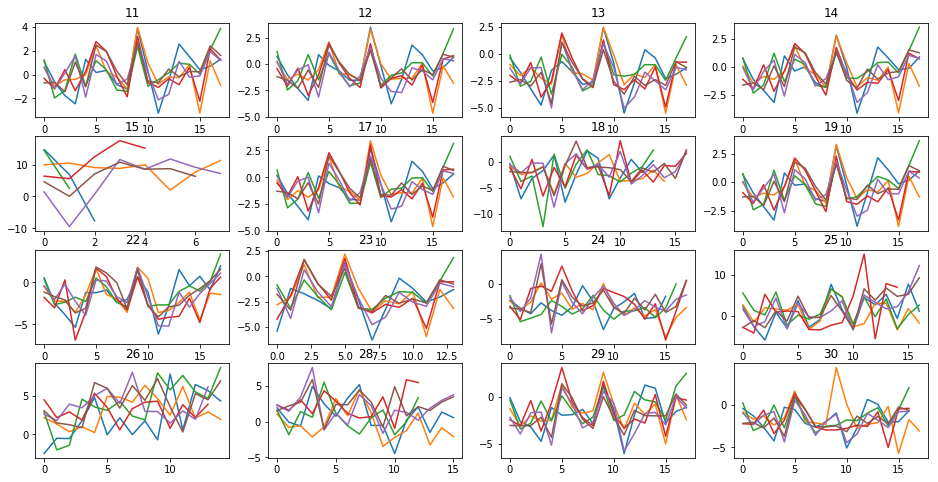

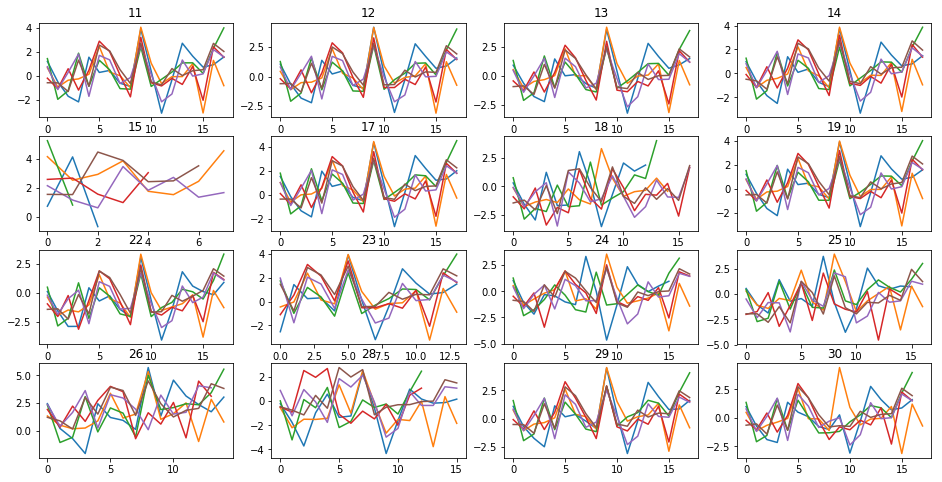

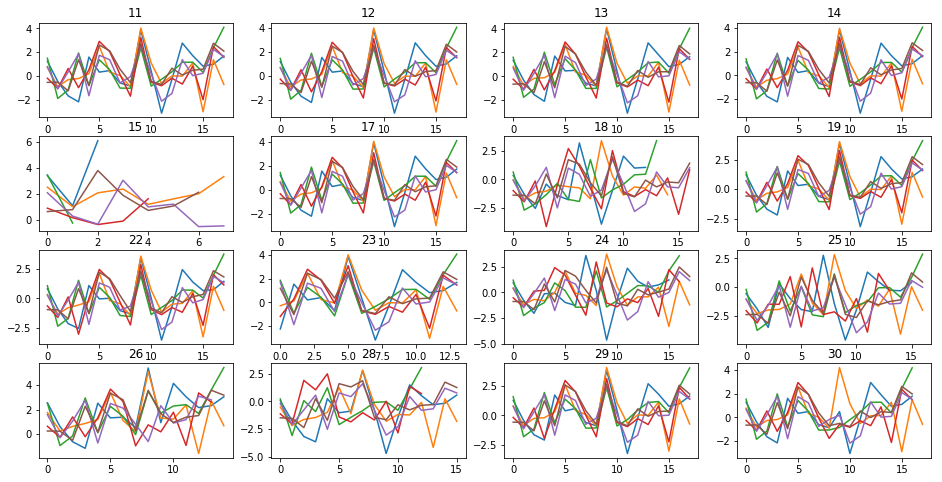

In [25]:
fid = 31 # best s/n
nant = len(np.unique(data['ANTENNA1']))

for selfcaliter in (1,2,3,4):
    caltable = f'../W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_phase{selfcaliter}_int.cal/'
    tb.open(caltable)
    data = {col: tb.getcol(col) for col in tb.colnames() if col not in ("WEIGHT",)}
    data['ANGLE'] = np.angle(data['CPARAM'])
    tb.close()
    OK = data['SNR'] != 0


    for oid in np.unique(data['OBSERVATION_ID']):
        for pol in (0,):
            pl.figure()
            cnt = 0

            for ii,ant in enumerate(np.unique(data['ANTENNA1'])):
                ax = pl.subplot(4, 4, cnt+1)
                msk = (data['ANTENNA1'] == ant) & (data['FIELD_ID'] == fid) & (OK[pol,0,:]) & (data['OBSERVATION_ID'] == oid)
                spws = data['SPECTRAL_WINDOW_ID'][msk]


                if np.any(msk):
                    cnt += 1
                    for spw in np.unique(spws):
                        smsk = msk & (data['SPECTRAL_WINDOW_ID'] == spw)
                        time = data['TIME'][smsk] 
                        time -= np.min(time)
                        time /= 60
                        ang = data['ANGLE'][pol,0,smsk]*180/np.pi
                        srt = np.argsort(time)
                        #ax.plot(time[srt], ang[srt], '.')
                        ax.plot(ang[srt], '-')
                    ax.set_title(str(ant))
                if cnt > 15:
                    break
            break
        break


In [26]:
msmd.close()

True

In [27]:
for selfcaliter in (1,2,3,4):
    caltable = f'../W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_phase{selfcaliter}_int.cal/'
    tb.open(caltable)
    data = {col: tb.getcol(col) for col in tb.colnames() if col not in ("WEIGHT",)}
    data['ANGLE'] = np.angle(data['CPARAM'])
    tb.close()
    OK = data['SNR'] != 0
    print(f"\nSelf cal iteration {selfcaliter}")

    for fid in fids_12m:
        dat = data['SNR'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
        ang = data['ANGLE'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])] * 180/np.pi
        print(f"fid={fid:03d} mean={dat.mean():10.2f} median={np.median(dat):10.2f} std={dat.std():10.2f} angle_rms={ang.std():10.2f}")


Self cal iteration 1
fid=011 mean=      3.35 median=      2.89 std=      2.10 angle_rms=     44.89
fid=012 mean=      4.01 median=      3.43 std=      2.52 angle_rms=     44.94
fid=013 mean=      4.67 median=      3.90 std=      3.09 angle_rms=     42.26
fid=014 mean=      2.72 median=      2.55 std=      1.42 angle_rms=     49.93
fid=015 mean=      5.28 median=      4.39 std=      3.62 angle_rms=     41.91
fid=016 mean=     15.50 median=     13.75 std=      8.68 angle_rms=     46.29
fid=017 mean=     28.99 median=     26.53 std=     17.36 angle_rms=     49.72
fid=018 mean=     20.95 median=     19.31 std=     12.08 angle_rms=     48.87
fid=019 mean=      2.84 median=      2.64 std=      1.59 angle_rms=     43.43
fid=020 mean=     12.09 median=     11.28 std=      6.57 angle_rms=     43.92
fid=021 mean=     46.67 median=     45.33 std=     27.66 angle_rms=     55.53
fid=022 mean=     44.54 median=     41.73 std=     27.71 angle_rms=     47.55
fid=023 mean=     26.98 median=     25.49 

## How well are the antennae performing?

Measure by looking at corrected - model and assessing residual.

In [42]:
from astropy import stats
ms.open(msfile)
antresids = {}
for oid in uoids:
    print(f"\nopening oid {oid}")
    ms.selectinit(oid, reset=True)
    ms.select(items={'antenna1': ant})
    msdata = ms.getdata(items=['RESIDUAL_DATA', 'MODEL_DATA', 'CORRECTED_DATA', 'ANTENNA1'])
    for ant in np.unique(msdata['antenna1']):
        selection = msdata['antenna1'] == ant
        model = msdata['model_data'][:,:,selection]
        corrected = msdata['corrected_data'][:,:,selection]
        resids = msdata['residual_data'][:,:,selection]
        resid_amp = np.abs(resids)
        resid_ang = np.angle(resids)
        model_amp = np.abs(model)
        corrected_amp = np.abs(corrected)
        antresids[(ant, oid)] = {'mean_amp_res': resid_amp.mean(),
                                 'median_amp_res': np.median(resid_amp),
                                 'std_amp_res': resid_amp.std(),
                                 'mad_amp_res': stats.mad_std(resid_amp),
                                 'mean_amp_mod': model_amp.mean(),
                                 'mean_amp_data': corrected_amp.mean(),
                                }
        print(f"oid {oid} ant {ant}:  "+" ".join([f"{key}={val:7.2f}" for key,val in antresids[(ant, oid)].items()]))
ms.close()

oid 2 ant 11:  mean_amp_res=   0.30 median_amp_res=   0.17 std_amp_res=   0.53 mad_amp_res=   0.15 mean_amp_mod=   0.41 mean_amp_data=   0.59
oid 2 ant 12:  mean_amp_res=   0.31 median_amp_res=   0.17 std_amp_res=   0.59 mad_amp_res=   0.14 mean_amp_mod=   0.42 mean_amp_data=   0.61
oid 2 ant 13:  mean_amp_res=   0.28 median_amp_res=   0.17 std_amp_res=   0.47 mad_amp_res=   0.14 mean_amp_mod=   0.30 mean_amp_data=   0.48
oid 2 ant 14:  mean_amp_res=   0.27 median_amp_res=   0.17 std_amp_res=   0.41 mad_amp_res=   0.14 mean_amp_mod=   0.29 mean_amp_data=   0.47
oid 2 ant 15:  mean_amp_res=   0.18 median_amp_res=   0.15 std_amp_res=   0.15 mad_amp_res=   0.11 mean_amp_mod=   0.01 mean_amp_data=   0.18
oid 2 ant 16:  mean_amp_res=   0.16 median_amp_res=   0.13 std_amp_res=   0.12 mad_amp_res=   0.10 mean_amp_mod=   0.00 mean_amp_data=   0.16
oid 2 ant 17:  mean_amp_res=   0.31 median_amp_res=   0.17 std_amp_res=   0.57 mad_amp_res=   0.15 mean_amp_mod=   0.29 mean_amp_data=   0.48
oid 2 

TypeError: close() takes 1 positional argument but 2 were given

In [60]:
antstats[(67,12)]

{'mean': 63.60706990562263,
 'median': 57.113674163818359,
 'std': 40.951331261564725,
 'angle_rms': 0.055511395934503951}

In [56]:
from astropy import stats
ms.open(msfile)
antresids = {}
oid = 12
ant = 67
print(f"\nopening oid {oid}")
ms.selectinit(oid, reset=True)
ms.select(items={'antenna1': ant})
msdata = ms.getdata(items=['RESIDUAL_DATA', 'MODEL_DATA', 'CORRECTED_DATA', 'ANTENNA1', 'UVDIST'])
selection = msdata['antenna1'] == ant
print(msdata['antenna1'].shape, msdata['uvdist'].shape, msdata['model_data'].shape)
model = msdata['model_data'][:,:,selection]
corrected = msdata['corrected_data'][:,:,selection]
resids = msdata['residual_data'][:,:,selection]
uvdist = msdata['uvdist'][selection]
resid_amp = np.abs(resids)
resid_ang = np.angle(resids)
model_amp = np.abs(model)
corrected_amp = np.abs(corrected)
ms.close()


opening oid 12
(36450,) (36450,) (2, 2, 36450)


True

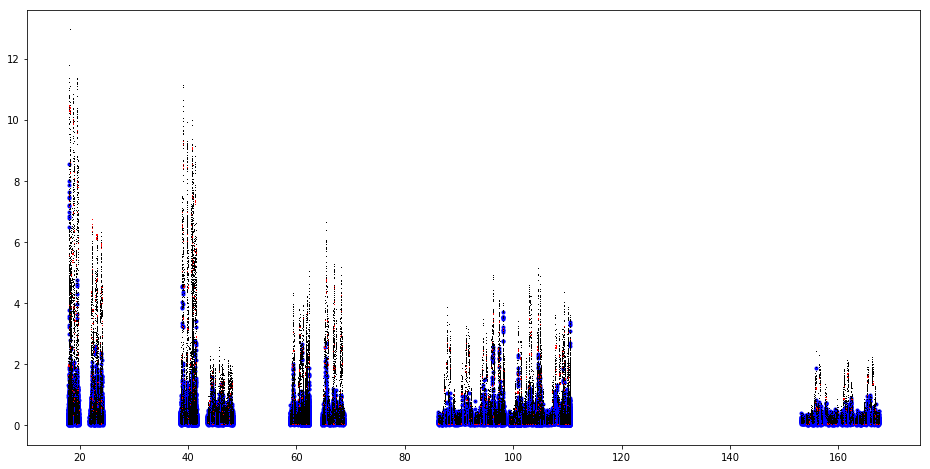

In [69]:
pol = 0
spw = 1
pl.plot(uvdist, resid_amp[pol,spw,:], 'b.')
pl.plot(uvdist, model_amp[pol,spw,:], 'r,')
pl.plot(uvdist, corrected_amp[pol,spw,:], 'k,')


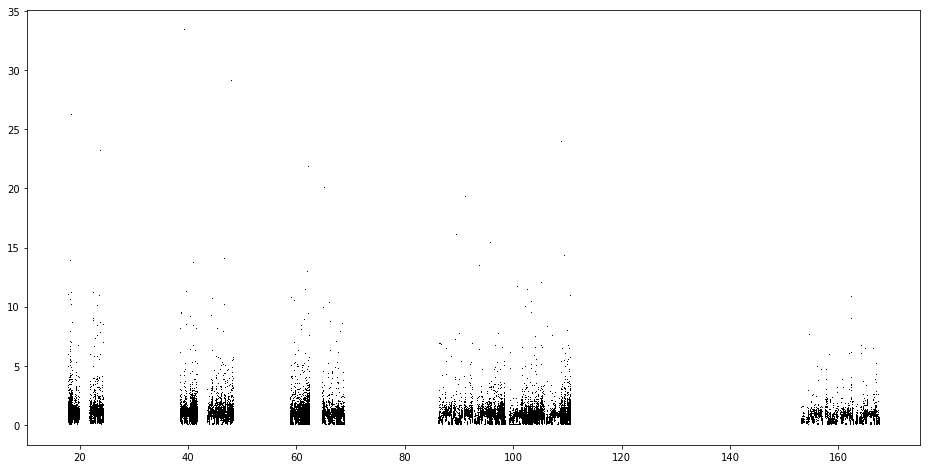

In [68]:
pl.plot(uvdist, model_amp[pol,spw,:]/corrected_amp[pol,spw,:], 'k,')